Epoch 1/50
256/256 [==============================] - 15s 55ms/step - loss: 0.4798 - accuracy: 0.7739 - val_loss: 0.3831 - val_accuracy: 0.8369
Epoch 2/50
256/256 [==============================] - 14s 55ms/step - loss: 0.3464 - accuracy: 0.8531 - val_loss: 0.4222 - val_accuracy: 0.8159
Epoch 3/50
256/256 [==============================] - 14s 55ms/step - loss: 0.3229 - accuracy: 0.8713 - val_loss: 0.2344 - val_accuracy: 0.9141
Epoch 4/50
256/256 [==============================] - 14s 55ms/step - loss: 0.2185 - accuracy: 0.9208 - val_loss: 0.1870 - val_accuracy: 0.9448
Epoch 5/50
256/256 [==============================] - 14s 55ms/step - loss: 0.1922 - accuracy: 0.9362 - val_loss: 0.1155 - val_accuracy: 0.9741
Epoch 6/50
256/256 [==============================] - 14s 56ms/step - loss: 0.1234 - accuracy: 0.9640 - val_loss: 0.1215 - val_accuracy: 0.9629
Epoch 7/50
256/256 [==============================] - 14s 56ms/step - loss: 0.0982 - accuracy: 0.9728 - val_loss: 0.0807 - val_accuracy:

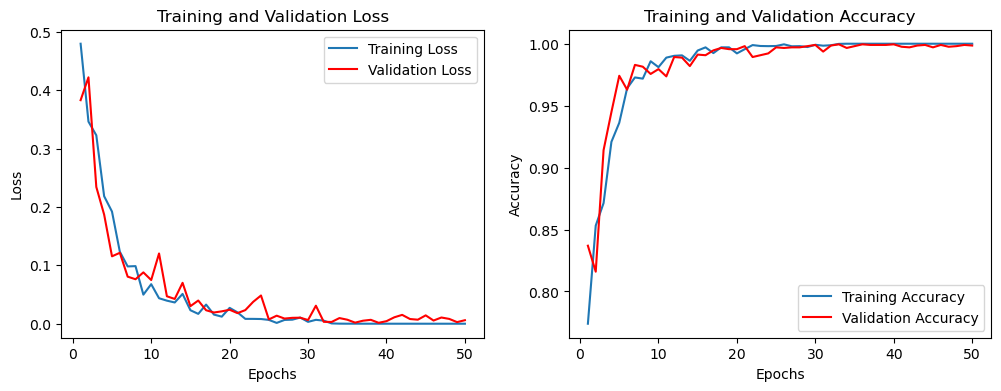

Accuracy: 99.609375
Precision: 100.0
Recall: 99.21875
F1-Score: 99.6078431372549


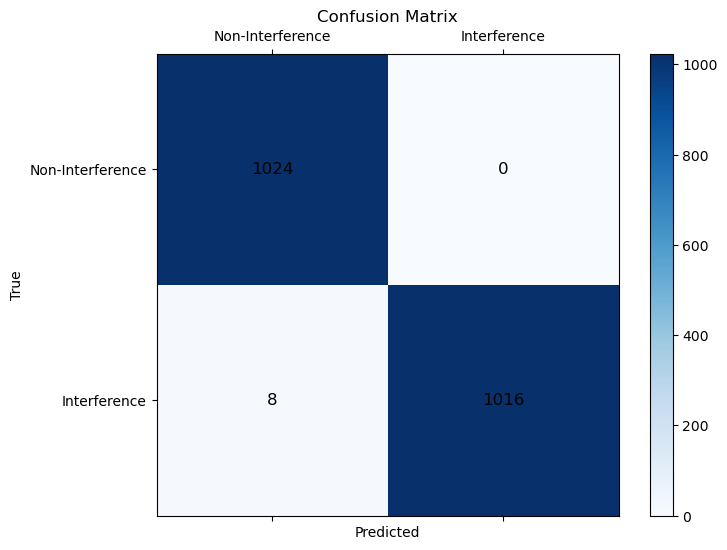

True Positive Rate (TPR):[99.21875]
False Positive Rate (FPR):[0.]


In [32]:
### Necessary Libraries 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import scipy.io
import tensorflow as tf
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, classification_report, confusion_matrix
import os
from tensorflow.keras import preprocessing
from tensorflow import keras


# Import TRAINING PATH
TRAINING_DATA_PATH = r'C:\Users\erhan.karakoca\Documents\GitHub\wireless_interference_classification\training_data' 
my_file_path_train = [file for file in os.listdir(TRAINING_DATA_PATH) if file.endswith('.mat')]
# Function which aids to import TRAINING Data
def custom_data_generator(data_directory, batch_size, train=True):

    """
    Custom data generator for training and validation
    It reads from the given directory and yields the data in batches
    It handles shuffling and the start and end indices for training and validation
    :param data_directory: Directory containing the data files
    :param batch_size: Batch size
    :param train: True for training, False for validation
    :return: "yield" feature array(stft of the considered signal) and label array (0 -no interference 
                                                                                   1 - with interference)
    """
    file_list = os.listdir(data_directory)
    num_files = len(file_list)

    # Determine the start and end indices based on train flag
    if train:
        start_index, end_index = 0, int(0.8 * num_files)  # 80% for training
    else:
        start_index, end_index = int(0.8 * num_files), num_files  # 20% for validation

    while True:
        # Shuffle the file indices for each epoch
        # It ensures to span all dataset and take the values only once
        batch_indices = np.random.choice(np.arange(start_index, end_index), batch_size, replace=False)

        feature_array = []
        label_array = []
        for index in shuffle(batch_indices):

            file_path = os.path.join(data_directory, file_list[index])
            mat_data = scipy.io.loadmat(file_path)  # Adjust based on your data structure

            features = mat_data['data']  # Adjust based on your data structure

            features = np.expand_dims(features, axis=-1)
            feature_array.append(features)

            labels = mat_data['labels']  # Adjust based on your data structure

            label_array.append(np.squeeze(labels))
        feature_array = np.array(feature_array)
        label_array = np.array(label_array)

        yield feature_array, label_array #aldıklarım
# Function which aids to import TEST Data 
def load_test_data(data_directory):
    file_list = os.listdir(data_directory)
    num_files = len(file_list)
    feature_array = []
    label_array = []
    for index in range(num_files):
        file_path = os.path.join(data_directory, file_list[index])
        mat_data = scipy.io.loadmat(file_path)  # Adjust based on your data structure
        features = mat_data['data']  # Adjust based on your data structure
        features = np.expand_dims(features, axis=-1)
        feature_array.append(features)
        labels = mat_data['labels']  # Adjust based on your data structure
        label_array.append(np.squeeze(labels))
    test_feature_array = np.array(feature_array)
    test_label_array = np.array(label_array)
    test_feature_array, test_label_array =  shuffle(test_feature_array, test_label_array)
    return test_feature_array, test_label_array
# Set directories and inital settings. These are num_files, batch size, dimensions
num_files = 10240
x_dim=128
y_dim=313
channels=1
input_shape = (x_dim, y_dim, channels)
#CNN tensorflow and keras (Filters for design) implementation
#  Warning : Part and one imaginary part so we can say that it has 2 channels ! - In that case input shape would be (x_dim, y_dim, 2)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(x_dim, y_dim, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Making Generations : performance matrixs
file_list = os.listdir(TRAINING_DATA_PATH)
file_list_validation = os.listdir()
num_files = len(file_list)
# Model.compile: minimizing error

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Provide iteration for every step, if it increases, system will learn much more
batch_size = 32 
train_data_generator = custom_data_generator(TRAINING_DATA_PATH, batch_size, train=True)
validation_data_generator = custom_data_generator(TRAINING_DATA_PATH, batch_size, train=False)

# Model fitting
history= model.fit(train_data_generator, epochs=50, verbose=1, steps_per_epoch=int(0.8 * num_files) // batch_size,validation_data=validation_data_generator, validation_steps=int(0.2 * num_files) // batch_size)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range (1, len(train_loss)+1)
# Loss Graph
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(epochs,train_loss,label='Training Loss')
plt.plot(epochs, val_loss ,'r',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Accuracy Graph
plt.subplot (1,2,2)
plt.plot(epochs,train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Using Test Data and make predictions 
# load test data ---> feature array, label array 

TEST_DATA_PATH = r'C:\Users\erhan.karakoca\Documents\GitHub\wireless_interference_classification\test_data'
my_file_path_test = [file for file in os.listdir(TEST_DATA_PATH) if file.endswith('.mat')]
test_inputs, test_labels  = load_test_data(TEST_DATA_PATH)

y_pred = model.predict (test_inputs)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy= accuracy_score (test_labels,y_pred_binary )
precision = precision_score (test_labels, y_pred_binary )
recall = recall_score (test_labels, y_pred_binary )
f1 = f1_score (test_labels, y_pred_binary )
conf_matrix = confusion_matrix (test_labels, y_pred_binary)

# Visualizing -----> Confusion matrix and printing another performance matrixs

print(f'Accuracy: {accuracy*100}')
print(f'Precision: {precision*100}')
print(f'Recall: {recall*100}')
print(f'F1-Score: {f1*100}')

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(conf_matrix, cmap='Blues')
fig.colorbar(cax)

plt.xticks(np.arange(2), ['Non-Interference', 'Interference'])
plt.yticks(np.arange(2), ['Non-Interference', 'Interference'])

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', fontsize=12)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# her epochta grafikleri çizdir
tp = sum((true == 1) and (predicted == 1) for true, predicted in zip(test_labels, y_pred_binary))
tn = sum((true == 0) and (predicted == 0) for true, predicted in zip(test_labels, y_pred_binary))
fp = sum((true == 0) and (predicted == 1) for true, predicted in zip(test_labels, y_pred_binary))
fn = sum((true == 1) and (predicted == 0) for true, predicted in zip(test_labels, y_pred_binary))
# True Positive Rate veya Sensitivity
tpr = (tp / (tp + fn))*100 if (tp + fn) != 0 else 0

# False Positive Rate
fpr = (fp / (fp + tn))*100 if (fp + tn) != 0 else 0

print(f'True Positive Rate (TPR):{tpr}')
print(f'False Positive Rate (FPR):{fpr}')


Epoch 1/50
256/256 [==============================] - 8s 27ms/step - loss: 0.3921 - accuracy: 0.8185 - val_loss: 0.1774 - val_accuracy: 0.9292
Epoch 2/50
256/256 [==============================] - 6s 25ms/step - loss: 0.1455 - accuracy: 0.9489 - val_loss: 0.1288 - val_accuracy: 0.9541
Epoch 3/50
256/256 [==============================] - 6s 25ms/step - loss: 0.0946 - accuracy: 0.9683 - val_loss: 0.0891 - val_accuracy: 0.9697
Epoch 4/50
256/256 [==============================] - 7s 26ms/step - loss: 0.0610 - accuracy: 0.9817 - val_loss: 0.1174 - val_accuracy: 0.9639
Epoch 5/50
256/256 [==============================] - 7s 25ms/step - loss: 0.0629 - accuracy: 0.9803 - val_loss: 0.0500 - val_accuracy: 0.9800
Epoch 6/50
256/256 [==============================] - 7s 26ms/step - loss: 0.0480 - accuracy: 0.9866 - val_loss: 0.0470 - val_accuracy: 0.9893
Epoch 7/50
256/256 [==============================] - 6s 24ms/step - loss: 0.0317 - accuracy: 0.9899 - val_loss: 0.0324 - val_accuracy: 0.9961

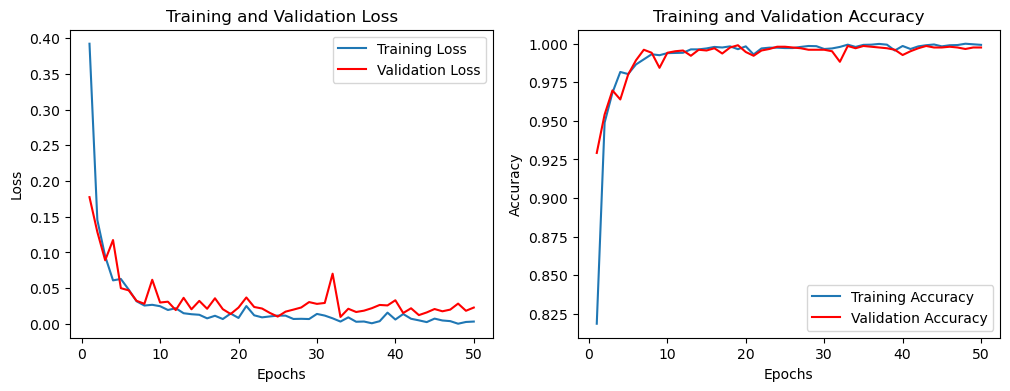

Accuracy: 99.560546875
Precision: 100.0
Recall: 99.12109375
F1-Score: 99.55860716037273


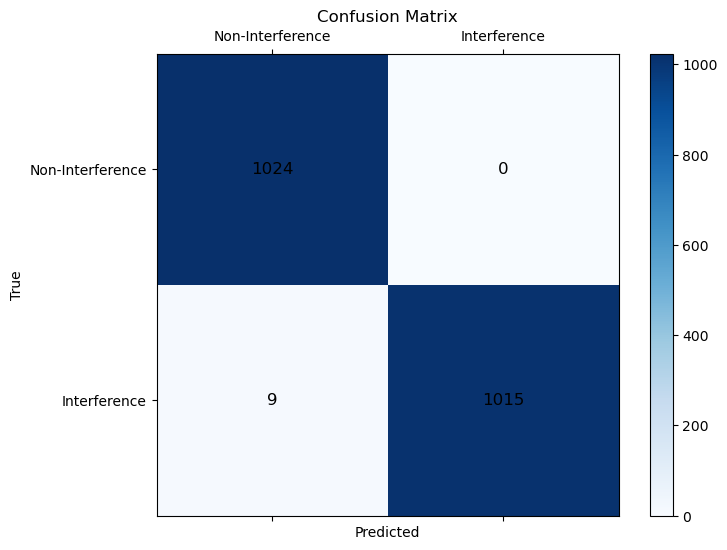

True Positive Rate (TPR):[99.12109375]
False Positive Rate (FPR):[0.]


In [31]:
### Necessary Libraries 
# Changing Filters parameters
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import scipy.io
import tensorflow as tf
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, classification_report, confusion_matrix
import os
from tensorflow.keras import preprocessing
from tensorflow import keras


# Import TRAINING PATH
TRAINING_DATA_PATH = r'C:\Users\erhan.karakoca\Documents\GitHub\wireless_interference_classification\training_data' 
my_file_path_train = [file for file in os.listdir(TRAINING_DATA_PATH) if file.endswith('.mat')]
# Function which aids to import TRAINING Data
def custom_data_generator(data_directory, batch_size, train=True):

    """
    Custom data generator for training and validation
    It reads from the given directory and yields the data in batches
    It handles shuffling and the start and end indices for training and validation
    :param data_directory: Directory containing the data files
    :param batch_size: Batch size
    :param train: True for training, False for validation
    :return: "yield" feature array(stft of the considered signal) and label array (0 -no interference 
                                                                                   1 - with interference)
    """
    file_list = os.listdir(data_directory)
    num_files = len(file_list)

    # Determine the start and end indices based on train flag
    if train:
        start_index, end_index = 0, int(0.8 * num_files)  # 80% for training
    else:
        start_index, end_index = int(0.8 * num_files), num_files  # 20% for validation

    while True:
        # Shuffle the file indices for each epoch
        # It ensures to span all dataset and take the values only once
        batch_indices = np.random.choice(np.arange(start_index, end_index), batch_size, replace=False)

        feature_array = []
        label_array = []
        for index in shuffle(batch_indices):

            file_path = os.path.join(data_directory, file_list[index])
            mat_data = scipy.io.loadmat(file_path)  # Adjust based on your data structure

            features = mat_data['data']  # Adjust based on your data structure

            features = np.expand_dims(features, axis=-1)
            feature_array.append(features)

            labels = mat_data['labels']  # Adjust based on your data structure

            label_array.append(np.squeeze(labels))
        feature_array = np.array(feature_array)
        label_array = np.array(label_array)

        yield feature_array, label_array #aldıklarım
# Function which aids to import TEST Data 
def load_test_data(data_directory):
    file_list = os.listdir(data_directory)
    num_files = len(file_list)
    feature_array = []
    label_array = []
    for index in range(num_files):
        file_path = os.path.join(data_directory, file_list[index])
        mat_data = scipy.io.loadmat(file_path)  # Adjust based on your data structure
        features = mat_data['data']  # Adjust based on your data structure
        features = np.expand_dims(features, axis=-1)
        feature_array.append(features)
        labels = mat_data['labels']  # Adjust based on your data structure
        label_array.append(np.squeeze(labels))
    test_feature_array = np.array(feature_array)
    test_label_array = np.array(label_array)
    test_feature_array, test_label_array =  shuffle(test_feature_array, test_label_array)
    return test_feature_array, test_label_array
# Set directories and inital settings. These are num_files, batch size, dimensions
num_files = 10240
x_dim=128
y_dim=313
channels=1
input_shape = (x_dim, y_dim, channels)
#CNN tensorflow and keras(Filters for design) implementation
#  Warning : Part and one imaginary part so we can say that it has 2 channels ! - In that case input shape would be (x_dim, y_dim, 2)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (5, 5), activation='relu', input_shape=(x_dim, y_dim, 1)),
    tf.keras.layers.MaxPooling2D((4, 4)),
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D((4, 4)),
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Making Generations : performance matrixs
file_list = os.listdir(TRAINING_DATA_PATH)
file_list_validation = os.listdir()
num_files = len(file_list)
# Model.compile: minimizing error
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Provide iteration for every step, if it increases, system will learn much more
batch_size = 32 
train_data_generator = custom_data_generator(TRAINING_DATA_PATH, batch_size, train=True)
validation_data_generator = custom_data_generator(TRAINING_DATA_PATH, batch_size, train=False)

# Model fitting
history= model.fit(train_data_generator, epochs=50, verbose=1, steps_per_epoch=int(0.8 * num_files) // batch_size,validation_data=validation_data_generator, validation_steps=int(0.2 * num_files) // batch_size)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range (1, len(train_loss)+1)
# Loss Graph
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(epochs,train_loss,label='Training Loss')
plt.plot(epochs, val_loss ,'r',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Accuracy Graph
plt.subplot (1,2,2)
plt.plot(epochs,train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Using Test Data and make predictions 
# load test data ---> feature array, label array 

TEST_DATA_PATH = r'C:\Users\erhan.karakoca\Documents\GitHub\wireless_interference_classification\test_data'
my_file_path_test = [file for file in os.listdir(TEST_DATA_PATH) if file.endswith('.mat')]
test_inputs, test_labels  = load_test_data(TEST_DATA_PATH)

y_pred = model.predict (test_inputs)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy= accuracy_score (test_labels,y_pred_binary )
precision = precision_score (test_labels, y_pred_binary )
recall = recall_score (test_labels, y_pred_binary )
f1 = f1_score (test_labels, y_pred_binary )
conf_matrix = confusion_matrix (test_labels, y_pred_binary)
conf_matrix_percentage = conf_matrix / np.sum(conf_matrix, axis=1, keepdims=True) * 100
# Visualizing -----> Confusion matrix and printing another performance matrixs

print(f'Accuracy: {accuracy*100}')
print(f'Precision: {precision*100}')
print(f'Recall: {recall*100}')
print(f'F1-Score: {f1*100}')

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(conf_matrix, cmap='Blues')
fig.colorbar(cax)

plt.xticks(np.arange(2), ['Non-Interference', 'Interference'])
plt.yticks(np.arange(2), ['Non-Interference', 'Interference'])

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', fontsize=12)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# her epochta grafikleri çizdir
tp = sum((true == 1) and (predicted == 1) for true, predicted in zip(test_labels, y_pred_binary))
tn = sum((true == 0) and (predicted == 0) for true, predicted in zip(test_labels, y_pred_binary))
fp = sum((true == 0) and (predicted == 1) for true, predicted in zip(test_labels, y_pred_binary))
fn = sum((true == 1) and (predicted == 0) for true, predicted in zip(test_labels, y_pred_binary))
# True Positive Rate veya Sensitivity
tpr = (tp / (tp + fn))*100 if (tp + fn) != 0 else 0

# False Positive Rate
fpr = (fp / (fp + tn))*100 if (fp + tn) != 0 else 0

print(f'True Positive Rate (TPR):{tpr}')
print(f'False Positive Rate (FPR):{fpr}')



Epoch 1/50
256/256 [==============================] - 15s 56ms/step - loss: 0.6930 - accuracy: 0.5231 - val_loss: 0.6928 - val_accuracy: 0.4956
Epoch 2/50
256/256 [==============================] - 14s 56ms/step - loss: 0.6927 - accuracy: 0.5261 - val_loss: 0.6944 - val_accuracy: 0.4971
Epoch 3/50
256/256 [==============================] - 14s 56ms/step - loss: 0.6929 - accuracy: 0.5198 - val_loss: 0.6928 - val_accuracy: 0.4941
Epoch 4/50
256/256 [==============================] - 14s 56ms/step - loss: 0.6927 - accuracy: 0.5100 - val_loss: 0.6924 - val_accuracy: 0.5015
Epoch 5/50
256/256 [==============================] - 14s 56ms/step - loss: 0.6924 - accuracy: 0.5183 - val_loss: 0.6928 - val_accuracy: 0.4971
Epoch 6/50
256/256 [==============================] - 14s 56ms/step - loss: 0.6926 - accuracy: 0.5072 - val_loss: 0.6921 - val_accuracy: 0.5645
Epoch 7/50
256/256 [==============================] - 14s 56ms/step - loss: 0.6920 - accuracy: 0.5222 - val_loss: 0.6918 - val_accuracy:

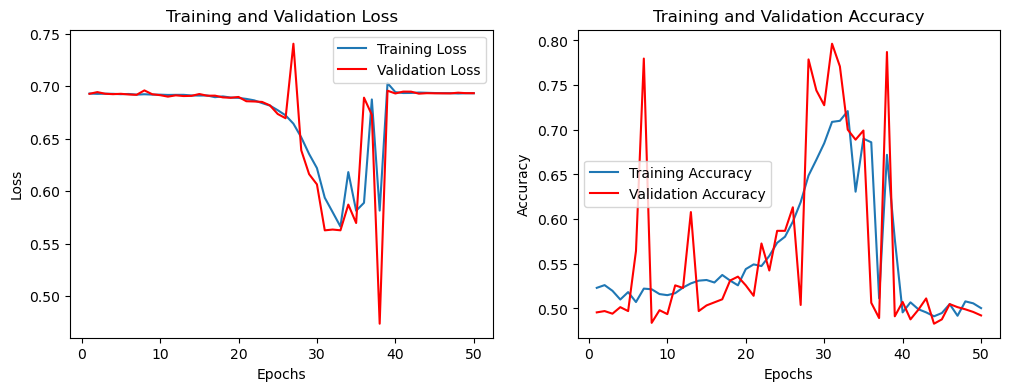

Accuracy: 50.0
Precision: 50.0
Recall: 100.0
F1-Score: 66.66666666666666


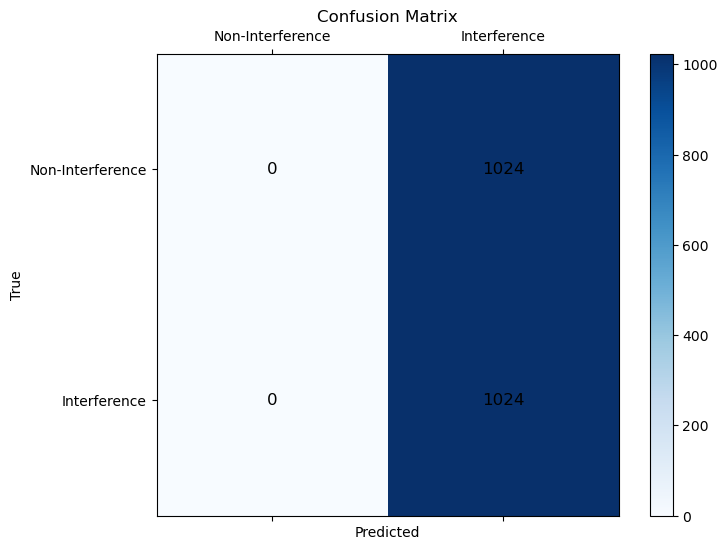

True Positive Rate (TPR):[100.]
False Positive Rate (FPR):[100.]


In [33]:
### Necessary Libraries 
# Changing optimizer = 'sgd'
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import scipy.io
import tensorflow as tf
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, classification_report, confusion_matrix
import os
from tensorflow.keras import preprocessing
from tensorflow import keras
from tensorflow.keras.optimizers import SGD


# Import TRAINING PATH
TRAINING_DATA_PATH = r'C:\Users\erhan.karakoca\Documents\GitHub\wireless_interference_classification\training_data' 
my_file_path_train = [file for file in os.listdir(TRAINING_DATA_PATH) if file.endswith('.mat')]
# Function which aids to import TRAINING Data
def custom_data_generator(data_directory, batch_size, train=True):

    """
    Custom data generator for training and validation
    It reads from the given directory and yields the data in batches
    It handles shuffling and the start and end indices for training and validation
    :param data_directory: Directory containing the data files
    :param batch_size: Batch size
    :param train: True for training, False for validation
    :return: "yield" feature array(stft of the considered signal) and label array (0 -no interference 
                                                                                   1 - with interference)
    """
    file_list = os.listdir(data_directory)
    num_files = len(file_list)

    # Determine the start and end indices based on train flag
    if train:
        start_index, end_index = 0, int(0.8 * num_files)  # 80% for training
    else:
        start_index, end_index = int(0.8 * num_files), num_files  # 20% for validation

    while True:
        # Shuffle the file indices for each epoch
        # It ensures to span all dataset and take the values only once
        batch_indices = np.random.choice(np.arange(start_index, end_index), batch_size, replace=False)

        feature_array = []
        label_array = []
        for index in shuffle(batch_indices):

            file_path = os.path.join(data_directory, file_list[index])
            mat_data = scipy.io.loadmat(file_path)  # Adjust based on your data structure

            features = mat_data['data']  # Adjust based on your data structure

            features = np.expand_dims(features, axis=-1)
            feature_array.append(features)

            labels = mat_data['labels']  # Adjust based on your data structure

            label_array.append(np.squeeze(labels))
        feature_array = np.array(feature_array)
        label_array = np.array(label_array)

        yield feature_array, label_array #aldıklarım
# Function which aids to import TEST Data 
def load_test_data(data_directory):
    file_list = os.listdir(data_directory)
    num_files = len(file_list)
    feature_array = []
    label_array = []
    for index in range(num_files):
        file_path = os.path.join(data_directory, file_list[index])
        mat_data = scipy.io.loadmat(file_path)  # Adjust based on your data structure
        features = mat_data['data']  # Adjust based on your data structure
        features = np.expand_dims(features, axis=-1)
        feature_array.append(features)
        labels = mat_data['labels']  # Adjust based on your data structure
        label_array.append(np.squeeze(labels))
    test_feature_array = np.array(feature_array)
    test_label_array = np.array(label_array)
    test_feature_array, test_label_array =  shuffle(test_feature_array, test_label_array)
    return test_feature_array, test_label_array
# Set directories and inital settings. These are num_files, batch size, dimensions
num_files = 10240
x_dim=128
y_dim=313
channels=1
input_shape = (x_dim, y_dim, channels)
#CNN tensorflow and keras(Filters for design) implementation
#  Warning : Part and one imaginary part so we can say that it has 2 channels ! - In that case input shape would be (x_dim, y_dim, 2)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(x_dim, y_dim, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Making Generations : performance matrixs
file_list = os.listdir(TRAINING_DATA_PATH)
file_list_validation = os.listdir()
num_files = len(file_list)
# Model.compile: minimizing error
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
# Provide iteration for every step, if it increases, system will learn much more
batch_size = 32 
train_data_generator = custom_data_generator(TRAINING_DATA_PATH, batch_size, train=True)
validation_data_generator = custom_data_generator(TRAINING_DATA_PATH, batch_size, train=False)

# Model fitting
history= model.fit(train_data_generator, epochs=50, verbose=1, steps_per_epoch=int(0.8 * num_files) // batch_size,validation_data=validation_data_generator, validation_steps=int(0.2 * num_files) // batch_size)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range (1, len(train_loss)+1)
# Loss Graph
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(epochs,train_loss,label='Training Loss')
plt.plot(epochs, val_loss ,'r',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Accuracy Graph
plt.subplot (1,2,2)
plt.plot(epochs,train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Using Test Data and make predictions 
# load test data ---> feature array, label array 

TEST_DATA_PATH = r'C:\Users\erhan.karakoca\Documents\GitHub\wireless_interference_classification\test_data'
my_file_path_test = [file for file in os.listdir(TEST_DATA_PATH) if file.endswith('.mat')]
test_inputs, test_labels  = load_test_data(TEST_DATA_PATH)

y_pred = model.predict (test_inputs)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy= accuracy_score (test_labels,y_pred_binary )
precision = precision_score (test_labels, y_pred_binary )
recall = recall_score (test_labels, y_pred_binary )
f1 = f1_score (test_labels, y_pred_binary )
conf_matrix = confusion_matrix (test_labels, y_pred_binary)

# Visualizing -----> Confusion matrix and printing another performance matrixs

print(f'Accuracy: {accuracy*100}')
print(f'Precision: {precision*100}')
print(f'Recall: {recall*100}')
print(f'F1-Score: {f1*100}')

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(conf_matrix, cmap='Blues')
fig.colorbar(cax)

plt.xticks(np.arange(2), ['Non-Interference', 'Interference'])
plt.yticks(np.arange(2), ['Non-Interference', 'Interference'])

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', fontsize=12)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# her epochta grafikleri çizdir
tp = sum((true == 1) and (predicted == 1) for true, predicted in zip(test_labels, y_pred_binary))
tn = sum((true == 0) and (predicted == 0) for true, predicted in zip(test_labels, y_pred_binary))
fp = sum((true == 0) and (predicted == 1) for true, predicted in zip(test_labels, y_pred_binary))
fn = sum((true == 1) and (predicted == 0) for true, predicted in zip(test_labels, y_pred_binary))
# True Positive Rate veya Sensitivity
tpr = (tp / (tp + fn))*100 if (tp + fn) != 0 else 0

# False Positive Rate
fpr = (fp / (fp + tn))*100 if (fp + tn) != 0 else 0

print(f'True Positive Rate (TPR):{tpr}')
print(f'False Positive Rate (FPR):{fpr}')



Epoch 1/50
256/256 [==============================] - 15s 57ms/step - loss: 0.4807 - accuracy: 0.8047 - val_loss: 0.4702 - val_accuracy: 0.7915
Epoch 2/50
256/256 [==============================] - 14s 56ms/step - loss: 0.3521 - accuracy: 0.9167 - val_loss: 0.3086 - val_accuracy: 0.9385
Epoch 3/50
256/256 [==============================] - 14s 56ms/step - loss: 0.3049 - accuracy: 0.9255 - val_loss: 0.2908 - val_accuracy: 0.9194
Epoch 4/50
256/256 [==============================] - 14s 56ms/step - loss: 0.2818 - accuracy: 0.9178 - val_loss: 0.1769 - val_accuracy: 0.9580
Epoch 5/50
256/256 [==============================] - 14s 56ms/step - loss: 0.1562 - accuracy: 0.9528 - val_loss: 0.1257 - val_accuracy: 0.9604
Epoch 6/50
256/256 [==============================] - 14s 56ms/step - loss: 0.0973 - accuracy: 0.9714 - val_loss: 0.3551 - val_accuracy: 0.8447
Epoch 7/50
256/256 [==============================] - 14s 56ms/step - loss: 0.1278 - accuracy: 0.9613 - val_loss: 0.0657 - val_accuracy:

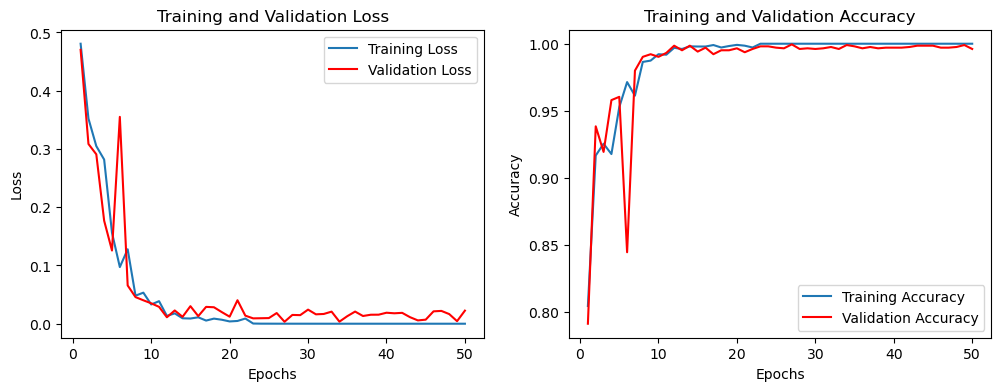

Accuracy: 99.560546875
Precision: 100.0
Recall: 99.12109375
F1-Score: 99.55860716037273


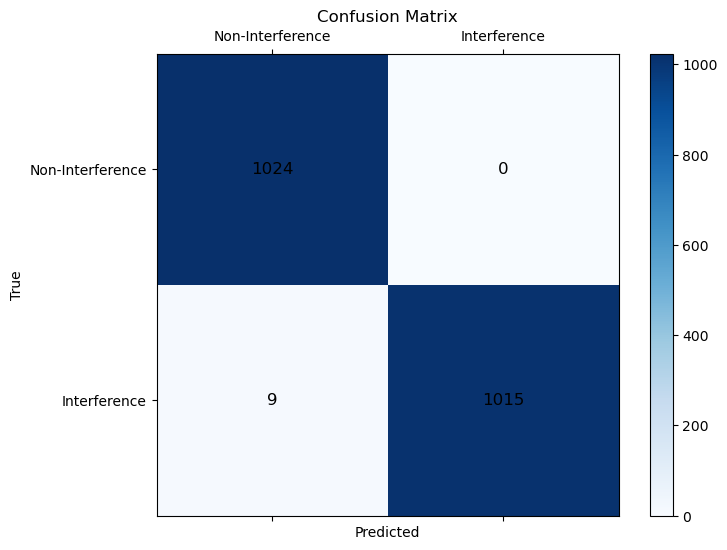

True Positive Rate (TPR):[99.12109375]
False Positive Rate (FPR):[0.]


In [34]:
### Necessary Libraries 
# Learning Rate difference
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import scipy.io
import tensorflow as tf
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, classification_report, confusion_matrix
import os
from tensorflow.keras import preprocessing
from tensorflow import keras


# Import TRAINING PATH
TRAINING_DATA_PATH = r'C:\Users\erhan.karakoca\Documents\GitHub\wireless_interference_classification\training_data' 
my_file_path_train = [file for file in os.listdir(TRAINING_DATA_PATH) if file.endswith('.mat')]
# Function which aids to import TRAINING Data
def custom_data_generator(data_directory, batch_size, train=True):

    """
    Custom data generator for training and validation
    It reads from the given directory and yields the data in batches
    It handles shuffling and the start and end indices for training and validation
    :param data_directory: Directory containing the data files
    :param batch_size: Batch size
    :param train: True for training, False for validation
    :return: "yield" feature array(stft of the considered signal) and label array (0 -no interference 
                                                                                   1 - with interference)
    """
    file_list = os.listdir(data_directory)
    num_files = len(file_list)

    # Determine the start and end indices based on train flag
    if train:
        start_index, end_index = 0, int(0.8 * num_files)  # 80% for training
    else:
        start_index, end_index = int(0.8 * num_files), num_files  # 20% for validation

    while True:
        # Shuffle the file indices for each epoch
        # It ensures to span all dataset and take the values only once
        batch_indices = np.random.choice(np.arange(start_index, end_index), batch_size, replace=False)

        feature_array = []
        label_array = []
        for index in shuffle(batch_indices):

            file_path = os.path.join(data_directory, file_list[index])
            mat_data = scipy.io.loadmat(file_path)  # Adjust based on your data structure

            features = mat_data['data']  # Adjust based on your data structure

            features = np.expand_dims(features, axis=-1)
            feature_array.append(features)

            labels = mat_data['labels']  # Adjust based on your data structure

            label_array.append(np.squeeze(labels))
        feature_array = np.array(feature_array)
        label_array = np.array(label_array)

        yield feature_array, label_array #aldıklarım
# Function which aids to import TEST Data 
def load_test_data(data_directory):
    file_list = os.listdir(data_directory)
    num_files = len(file_list)
    feature_array = []
    label_array = []
    for index in range(num_files):
        file_path = os.path.join(data_directory, file_list[index])
        mat_data = scipy.io.loadmat(file_path)  # Adjust based on your data structure
        features = mat_data['data']  # Adjust based on your data structure
        features = np.expand_dims(features, axis=-1)
        feature_array.append(features)
        labels = mat_data['labels']  # Adjust based on your data structure
        label_array.append(np.squeeze(labels))
    test_feature_array = np.array(feature_array)
    test_label_array = np.array(label_array)
    test_feature_array, test_label_array =  shuffle(test_feature_array, test_label_array)
    return test_feature_array, test_label_array
# Set directories and inital settings. These are num_files, batch size, dimensions
num_files = 10240
x_dim=128
y_dim=313
channels=1
input_shape = (x_dim, y_dim, channels)
#CNN tensorflow and keras(Filters for design) implementation
#  Warning : Part and one imaginary part so we can say that it has 2 channels ! - In that case input shape would be (x_dim, y_dim, 2)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(x_dim, y_dim, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Making Generations : performance matrixs
file_list = os.listdir(TRAINING_DATA_PATH)
file_list_validation = os.listdir()
num_files = len(file_list)
# Model.compile: minimizing error
adam_optimizer = Adam(learning_rate=0.005)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Provide iteration for every step, if it increases, system will learn much more
batch_size = 32 
train_data_generator = custom_data_generator(TRAINING_DATA_PATH, batch_size, train=True)
validation_data_generator = custom_data_generator(TRAINING_DATA_PATH, batch_size, train=False)

# Model fitting
history= model.fit(train_data_generator, epochs=50, verbose=1, steps_per_epoch=int(0.8 * num_files) // batch_size,validation_data=validation_data_generator, validation_steps=int(0.2 * num_files) // batch_size)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range (1, len(train_loss)+1)
# Loss Graph
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(epochs,train_loss,label='Training Loss')
plt.plot(epochs, val_loss ,'r',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Accuracy Graph
plt.subplot (1,2,2)
plt.plot(epochs,train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Using Test Data and make predictions 
# load test data ---> feature array, label array 

TEST_DATA_PATH = r'C:\Users\erhan.karakoca\Documents\GitHub\wireless_interference_classification\test_data'
my_file_path_test = [file for file in os.listdir(TEST_DATA_PATH) if file.endswith('.mat')]
test_inputs, test_labels  = load_test_data(TEST_DATA_PATH)

y_pred = model.predict (test_inputs)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy= accuracy_score (test_labels,y_pred_binary )
precision = precision_score (test_labels, y_pred_binary )
recall = recall_score (test_labels, y_pred_binary )
f1 = f1_score (test_labels, y_pred_binary )
conf_matrix = confusion_matrix (test_labels, y_pred_binary)

# Visualizing -----> Confusion matrix and printing another performance matrixs

print(f'Accuracy: {accuracy*100}')
print(f'Precision: {precision*100}')
print(f'Recall: {recall*100}')
print(f'F1-Score: {f1*100}')

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(conf_matrix, cmap='Blues')
fig.colorbar(cax)

plt.xticks(np.arange(2), ['Non-Interference', 'Interference'])
plt.yticks(np.arange(2), ['Non-Interference', 'Interference'])

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', fontsize=12)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# her epochta grafikleri çizdir
tp = sum((true == 1) and (predicted == 1) for true, predicted in zip(test_labels, y_pred_binary))
tn = sum((true == 0) and (predicted == 0) for true, predicted in zip(test_labels, y_pred_binary))
fp = sum((true == 0) and (predicted == 1) for true, predicted in zip(test_labels, y_pred_binary))
fn = sum((true == 1) and (predicted == 0) for true, predicted in zip(test_labels, y_pred_binary))
# True Positive Rate veya Sensitivity
tpr = (tp / (tp + fn))*100 if (tp + fn) != 0 else 0

# False Positive Rate
fpr = (fp / (fp + tn))*100 if (fp + tn) != 0 else 0

print(f'True Positive Rate (TPR):{tpr}')
print(f'False Positive Rate (FPR):{fpr}')



Epoch 1/50
64/64 [==============================] - 18s 217ms/step - loss: 0.6678 - accuracy: 0.6383 - val_loss: 0.5466 - val_accuracy: 0.5063
Epoch 2/50
64/64 [==============================] - 14s 216ms/step - loss: 0.5114 - accuracy: 0.7773 - val_loss: 0.4815 - val_accuracy: 0.8047
Epoch 3/50
64/64 [==============================] - 14s 217ms/step - loss: 0.4249 - accuracy: 0.8793 - val_loss: 0.3897 - val_accuracy: 0.9185
Epoch 4/50
64/64 [==============================] - 14s 215ms/step - loss: 0.3983 - accuracy: 0.8658 - val_loss: 0.4396 - val_accuracy: 0.7925
Epoch 5/50
64/64 [==============================] - 14s 217ms/step - loss: 0.3523 - accuracy: 0.8556 - val_loss: 0.2144 - val_accuracy: 0.9375
Epoch 6/50
64/64 [==============================] - 14s 217ms/step - loss: 0.2249 - accuracy: 0.9205 - val_loss: 0.1681 - val_accuracy: 0.9502
Epoch 7/50
64/64 [==============================] - 14s 217ms/step - loss: 0.2484 - accuracy: 0.9016 - val_loss: 0.4622 - val_accuracy: 0.7720

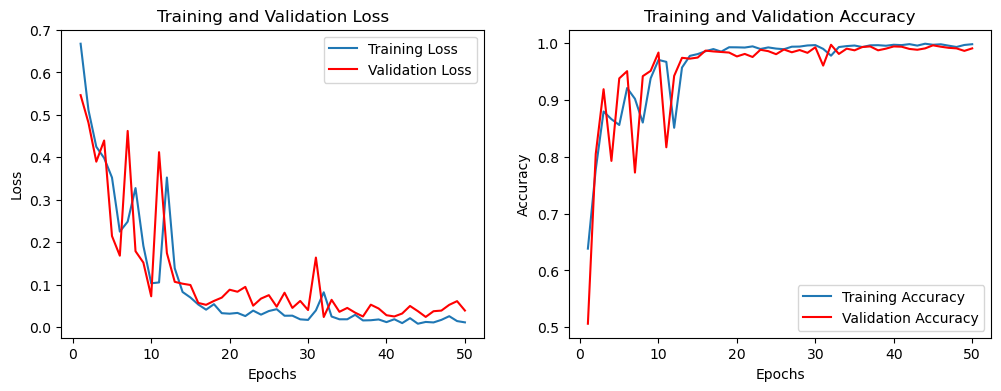

Accuracy: 98.681640625
Precision: 100.0
Recall: 97.36328125
F1-Score: 98.66402770905492


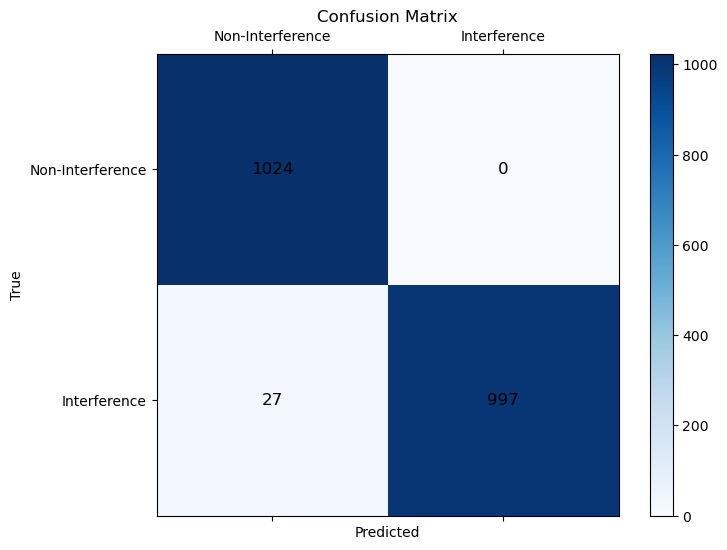

True Positive Rate (TPR):[97.36328125]
False Positive Rate (FPR):[0.]


In [36]:
### Necessary Libraries 
# Batch Size Difference
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import scipy.io
import tensorflow as tf
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, classification_report, confusion_matrix
import os
from tensorflow.keras import preprocessing
from tensorflow import keras


# Import TRAINING PATH
TRAINING_DATA_PATH = r'C:\Users\erhan.karakoca\Documents\GitHub\wireless_interference_classification\training_data' 
my_file_path_train = [file for file in os.listdir(TRAINING_DATA_PATH) if file.endswith('.mat')]
# Function which aids to import TRAINING Data
def custom_data_generator(data_directory, batch_size, train=True):

    """
    Custom data generator for training and validation
    It reads from the given directory and yields the data in batches
    It handles shuffling and the start and end indices for training and validation
    :param data_directory: Directory containing the data files
    :param batch_size: Batch size
    :param train: True for training, False for validation
    :return: "yield" feature array(stft of the considered signal) and label array (0 -no interference 
                                                                                   1 - with interference)
    """
    file_list = os.listdir(data_directory)
    num_files = len(file_list)

    # Determine the start and end indices based on train flag
    if train:
        start_index, end_index = 0, int(0.8 * num_files)  # 80% for training
    else:
        start_index, end_index = int(0.8 * num_files), num_files  # 20% for validation

    while True:
        # Shuffle the file indices for each epoch
        # It ensures to span all dataset and take the values only once
        batch_indices = np.random.choice(np.arange(start_index, end_index), batch_size, replace=False)

        feature_array = []
        label_array = []
        for index in shuffle(batch_indices):

            file_path = os.path.join(data_directory, file_list[index])
            mat_data = scipy.io.loadmat(file_path)  # Adjust based on your data structure

            features = mat_data['data']  # Adjust based on your data structure

            features = np.expand_dims(features, axis=-1)
            feature_array.append(features)

            labels = mat_data['labels']  # Adjust based on your data structure

            label_array.append(np.squeeze(labels))
        feature_array = np.array(feature_array)
        label_array = np.array(label_array)

        yield feature_array, label_array #aldıklarım
# Function which aids to import TEST Data 
def load_test_data(data_directory):
    file_list = os.listdir(data_directory)
    num_files = len(file_list)
    feature_array = []
    label_array = []
    for index in range(num_files):
        file_path = os.path.join(data_directory, file_list[index])
        mat_data = scipy.io.loadmat(file_path)  # Adjust based on your data structure
        features = mat_data['data']  # Adjust based on your data structure
        features = np.expand_dims(features, axis=-1)
        feature_array.append(features)
        labels = mat_data['labels']  # Adjust based on your data structure
        label_array.append(np.squeeze(labels))
    test_feature_array = np.array(feature_array)
    test_label_array = np.array(label_array)
    test_feature_array, test_label_array =  shuffle(test_feature_array, test_label_array)
    return test_feature_array, test_label_array
# Set directories and inital settings. These are num_files, batch size, dimensions
num_files = 10240
x_dim=128
y_dim=313
channels=1
input_shape = (x_dim, y_dim, channels)
#CNN tensorflow and keras(Filters for design) implementation
#  Warning : Part and one imaginary part so we can say that it has 2 channels ! - In that case input shape would be (x_dim, y_dim, 2)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(x_dim, y_dim, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Making Generations : performance matrixs
file_list = os.listdir(TRAINING_DATA_PATH)
file_list_validation = os.listdir()
num_files = len(file_list)
# Model.compile: minimizing error

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Provide iteration for every step, if it increases, system will learn much more
batch_size = 128
train_data_generator = custom_data_generator(TRAINING_DATA_PATH, batch_size, train=True)
validation_data_generator = custom_data_generator(TRAINING_DATA_PATH, batch_size, train=False)

# Model fitting
history= model.fit(train_data_generator, epochs=50, verbose=1, steps_per_epoch=int(0.8 * num_files) // batch_size,validation_data=validation_data_generator, validation_steps=int(0.2 * num_files) // batch_size)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range (1, len(train_loss)+1)
# Loss Graph
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(epochs,train_loss,label='Training Loss')
plt.plot(epochs, val_loss ,'r',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Accuracy Graph
plt.subplot (1,2,2)
plt.plot(epochs,train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Using Test Data and make predictions 
# load test data ---> feature array, label array 

TEST_DATA_PATH = r'C:\Users\erhan.karakoca\Documents\GitHub\wireless_interference_classification\test_data'
my_file_path_test = [file for file in os.listdir(TEST_DATA_PATH) if file.endswith('.mat')]
test_inputs, test_labels  = load_test_data(TEST_DATA_PATH)

y_pred = model.predict (test_inputs)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy= accuracy_score (test_labels,y_pred_binary )
precision = precision_score (test_labels, y_pred_binary )
recall = recall_score (test_labels, y_pred_binary )
f1 = f1_score (test_labels, y_pred_binary )
conf_matrix = confusion_matrix (test_labels, y_pred_binary)

# Visualizing -----> Confusion matrix and printing another performance matrixs

print(f'Accuracy: {accuracy*100}')
print(f'Precision: {precision*100}')
print(f'Recall: {recall*100}')
print(f'F1-Score: {f1*100}')

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(conf_matrix, cmap='Blues')
fig.colorbar(cax)

plt.xticks(np.arange(2), ['Non-Interference', 'Interference'])
plt.yticks(np.arange(2), ['Non-Interference', 'Interference'])

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', fontsize=12)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# her epochta grafikleri çizdir
tp = sum((true == 1) and (predicted == 1) for true, predicted in zip(test_labels, y_pred_binary))
tn = sum((true == 0) and (predicted == 0) for true, predicted in zip(test_labels, y_pred_binary))
fp = sum((true == 0) and (predicted == 1) for true, predicted in zip(test_labels, y_pred_binary))
fn = sum((true == 1) and (predicted == 0) for true, predicted in zip(test_labels, y_pred_binary))
# True Positive Rate veya Sensitivity
tpr = (tp / (tp + fn))*100 if (tp + fn) != 0 else 0

# False Positive Rate
fpr = (fp / (fp + tn))*100 if (fp + tn) != 0 else 0

print(f'True Positive Rate (TPR):{tpr}')
print(f'False Positive Rate (FPR):{fpr}')

